<a href="https://colab.research.google.com/github/AntoninaBarsukova/Coursera-ML/blob/main/CO_injection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
path = "/content/table_for_pythonL4A1.xlsx"

wb_obj = openpyxl.load_workbook(path)

sheet_obj = wb_obj.active

In [ ]:
#Cement Class G+Silica Four
#Liner 7''
  # pc - cement pore pressure
  # sigmah formtion Shmax
for i in range(20, 21):
  R_1 = sheet_obj.cell(row=i, column=3).value
  R_2 = sheet_obj.cell(row=i, column=4).value
  R_3 = sheet_obj.cell(row=i, column=15).value
  R_4 = 1
  R_5 = 2
  R_6 = 10
  R_7 = 100
  R_8 = 500
  R_9 = 1000
  alpha_1 = sheet_obj.cell(row=i, column=7).value
  alpha_2 = sheet_obj.cell(row=i, column=18).value
  alpha_3 = sheet_obj.cell(row=i, column=18).value
  alpha_10 = sheet_obj.cell(row=i, column=28).value
  E_1 = sheet_obj.cell(row=i, column=5).value
  E_2 = sheet_obj.cell(row=i, column=16).value
  E_3 = sheet_obj.cell(row=i, column=16).value
  E_10 = sheet_obj.cell(row=i, column=26).value
  nu_1 = sheet_obj.cell(row=i, column=6).value
  nu_2 = sheet_obj.cell(row=i, column=17).value
  nu_3 = sheet_obj.cell(row=i, column=17).value
  nu_10 = sheet_obj.cell(row=i, column=27).value
  dT = sheet_obj.cell(row=i, column=35).value
  dPf = sheet_obj.cell(row=i, column=2).value
  pc = sheet_obj.cell(row=i, column=38).value
  sigmah = sheet_obj.cell(row=i, column=39).value
  deltasigmah = sheet_obj.cell(row=i, column=43).value
  deltapfreservoir = sheet_obj.cell(row=i, column=44).value


  biot_1 = 0
  biot_2 = 0.8
  biot_3 = 0.8
  biot_4 = 0.8
  biot_5 = biot_6 = biot_7 = biot_8 = biot_9 = biot_4
  

  K_1 = E_1 / 3 / (1 - 2 * nu_1)
  G_1 = E_1 / 2 / (1 + nu_1)
  K_2 = E_2 / 3 / (1 - 2 * nu_2)
  G_2 = E_2 / 2 / (1 + nu_2)
  K_3 = E_3 / 3 / (1 - 2 * nu_3)
  G_3 = E_3 / 2 / (1 + nu_3)
  K_4 = K_5 = K_6 = K_7 = K_8 = K_9 = K_3
  G_4 = G_5 = G_6 = G_7 = G_8 = G_9 = G_3
  K_10 = E_10 / 3 / (1 - 2 * nu_10)
  G_10 = E_10 / 2 / (1 + nu_10)
  sheet_obj.cell(row=i, column=10).value = K_1
  sheet_obj.cell(row=i, column=11).value = G_1
  sheet_obj.cell(row=i, column=21).value = K_2
  sheet_obj.cell(row=i, column=22).value = G_2
  sheet_obj.cell(row=i, column=31).value = K_10
  sheet_obj.cell(row=i, column=32).value = G_10
  r_1 = np.linspace(R_1, R_2)
  r_2 = np.linspace(R_2, R_3)
  r_3 = np.linspace(R_3, R_4)
  r_4 = np.linspace(R_4, R_5)
  r_5 = np.linspace(R_5, R_6)
  r_6 = np.linspace(R_6, R_7)
  r_7 = np.linspace(R_7, R_8)
  r_8 = np.linspace(R_8, R_9)
  r_9 = np.linspace(R_9, 2* R_9)

  n5 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2,  2 * G_10],                      
               [0, 0, 1, R_2**2 / R_3**2, -1]])   
                                                                                                                                    
  l5 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_10 * alpha_2 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])       
     
print(deltapfreservoir)

42.3


In [ ]:
# Initial state of stress in the host rock
 # pc - cement pore pressure (hydrostatic)
 # sigmah-  formtion Shmax

for i in range(20, 21):
  A_ri = -0.5 * sigmah * 1/(K_10 - ((K_10 - 2 * G_10 / 3)**2) / (K_10 + 4 * G_10 / 3))
  B_ri = (pc - sigmah) * R_3**2 / (2 * G_10)

  sheet_obj.cell(row=i, column=36).value = A_ri
  sheet_obj.cell(row=i, column=37).value = B_ri

A_ri, B_ri

(-0.005775528501228502, 2.897103047563626e-06)

In [ ]:
# Initial state of  radial stress in the host rock

In [ ]:
for i in range(20, 21):
  def n(sigmah, pc, R, r):
    return - sigmah - (pc - sigmah) * R**2 / r**2 

In [ ]:
for i in range(20, 21):
  n3 = n(sigmah, pc, R_3, r_3)

n3, r_3



In [ ]:
sigmah

66.515

In [ ]:
pc

68.71837

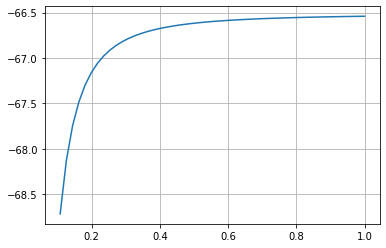

In [ ]:
 #Init radial stress rock
 for i in range(20, 21):
   plt.plot(r_3, n3)
   plt.grid(True)


In [ ]:
df = pd.DataFrame(r_3, n3)
df.to_csv("out.csv")

df

In [ ]:
# Initial state of hoop stress in the host rock


for i in range(20, 21):
  def h(sigmah, K, G, pc, R, r):
    return - sigmah * 9 * K / (8 * K - 4 / (3 * G)) + (pc - sigmah) * R**2 / r**2
    

In [ ]:
for i in range(6, 20):
  h3 = h(sigmah, K_10, G_10, pc, R_3, r_3)


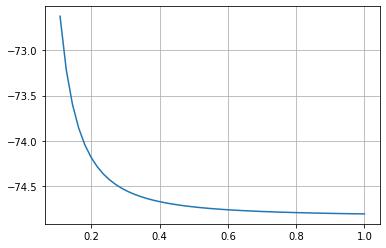

In [ ]:
for i in range(20, 21):
   plt.plot(r_3, h3)
   plt.grid(True)

In [ ]:
dl = pd.DataFrame(r_3, h3)
dl.to_csv("out.csv")

dl



,0
-72.626005,0.108000
-73.215804,0.126204
-73.596976,0.144408
-73.857460,0.162612
-74.043308,0.180816
-74.180532,0.199020
-74.284726,0.217224
-74.365697,0.235429
-74.429868,0.253633
-74.481584,0.271837


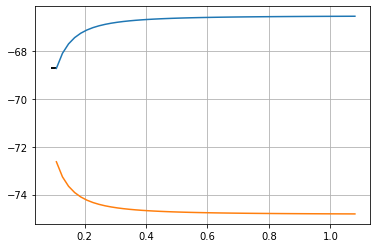

In [ ]:
for i in range(20, 21):
   plt.plot(r_3, n3)
   plt.plot(r_3, h3)
   #plt.hlines((-sigmah, -sigmah), r_3, 10 * r_3)
   plt.hlines((-pc, -pc), R_2, R_3)
   plt.grid(True)

In [ ]:
wb_obj.save("/content/table_for_pythonL4A1.xlsx")

In [ ]:
# depletion stage

In [ ]:
#gas depletion
# deltapfreservoir is the defference between reservoir pressure at the beginning and in the end of production. Here we use it as delta infinity which is 
# deltainfinity = alpha*delta temperature + beta*delta reservoir pressure
# delta temperature = 0 for production stage
# beta = biot coefficient, beta = 0 for casing, 0.75 for cement and 0.8 for the rock
# deltasigmah is the difference Shmax before and after production in the rock

print(K_10)
print(deltapfreservoir)
print(deltasigmah)
print(G_10)

7051.282051282051
42.3
25
4435.483870967742


In [ ]:
G_depl_1 = 2 * G_1 / ( K_1 + 4 * G_1 / 3)
G_depl_2 = 2 * G_2 / ( K_2 + 4 * G_2 / 3)
G_depl_3 = 2 * G_10 / ( K_10 + 4 * G_10 / 3)

print(G_depl_1)
print(G_depl_2)
print(G_depl_3)

0.5714285714285714
0.75
0.6842105263157895


In [ ]:
biot_1 = 0
biot_2 = 0.8
biot_3 = 0.8

delta_infinity_1 = 0
delta_infinity_2 = biot_2 * deltapfreservoir
delta_infinity_3 = biot_3 * deltapfreservoir

#deltamudpressure - diffecrence between mud pressure and the reservoir fluid pressure at the end of production
deltamudpressure = -34

print(delta_infinity_2)
print(delta_infinity_3)

33.839999999999996
33.839999999999996


In [ ]:
for i in range(20, 21):
  A_3_depl = (1 / (3 * K_10)) * (delta_infinity_3 + deltasigmah * (K_10 + 4 * G_10 / 3)/ (2 * G_10))

  print(A_3_depl)

0.0033269818181818176


In [ ]:
for i in range(20, 21):
  b5 = np.array([[3 * G_depl_1 * K_1, -2 * G_1, 0, 0, 0],                                                                 
                [3 * (G_depl_1 * K_1), -2 * G_1 * (R_1 / R_2)**2, -3 * G_depl_2 * K_2, 2 * G_2, 0],                       
                [1, (R_1 / R_2)**2, -1, -1, 0],                                                                                                                                        
                [0, 0, 3 * G_depl_2 * K_2, -2 * G_2 * (R_2 / R_3)**2,  2 * G_10],                      
                [0, 0, 1, (R_2 / R_3)**2, -1]])   

  print(b5) 


In [ ]:
# Calculation the inverse matrix
for i in range(20, 21):
  bb5 =np.linalg.inv(b5)

print(bb5)

In [ ]:
#Vector

for i in range(20, 21):
  c5 = np.array([[ - deltamudpressure],
                [- G_depl_2 * delta_infinity_2],
                [0],
                [G_depl_2 * delta_infinity_2 - G_depl_3 * delta_infinity_3 + 3 * G_depl_3 * K_10 * A_3_depl],
                [A_3_depl]])   
  
  print(c5) 


[[ 3.40000000e+01]
 [-2.53800000e+01]
 [ 0.00000000e+00]
 [ 5.03800000e+01]
 [ 3.32698182e-03]]


In [ ]:
#Multiplication of the inverse matrix by vector

for i in range(20, 21):
  aa = bb5.dot(c5)

print(aa)

In [ ]:
for i in range(20, 21):
  A_1_depl = aa[0]
  B_1_depl = aa[1] * R_1**2
  A_2_depl = aa[2]
  B_2_depl = aa[3] * R_2**2 
  B_3_depl = aa[4] * R_3**2
  
  sheet_obj.cell(row=i, column=12).value = A_1_depl[0]
  sheet_obj.cell(row=i, column=13).value = B_1_depl[0]
  sheet_obj.cell(row=i, column=23).value = A_2_depl[0]
  sheet_obj.cell(row=i, column=24).value = B_2_depl[0]
  sheet_obj.cell(row=i, column=33).value = A_3_depl
  sheet_obj.cell(row=i, column=34).value = B_3_depl[0]

  A_depl_1 = A_1_depl[0]
  B_depl_1 =B_1_depl[0]
  A_depl_2 = A_2_depl[0]
  B_depl_2 = B_2_depl[0]
  A_depl_3 = A_3_depl
  B_depl_3 = B_3_depl[0]


A_1_depl

A_1_depl

A_depl_1, B_1_depl, A_2_depl, B_2_depl, A_3_depl,  B_3_depl

(0.0003564225252811176,
 array([2.7984705e-06]),
 array([0.00326482]),
 array([-2.02389716e-05]),
 0.0033269818181818176,
 array([-2.09639892e-05]))

In [ ]:
# Radial stress change after depletion

def sigma_r_depl(G_depl, A_depl, K, delta_infinity, G, B_depl, r ):
    return G_depl * (3 * A_depl * K - delta_infinity) - 2 * G * B_depl / r**2

In [ ]:
#sigma_r_depl1 = G_depl_1 * (3 * A_1_depl * K_1 - delta_infinity_1) + 2 * G_1 * B_1_depl / R_1**2

#sigma_r_depl1



176.79846495197523

In [ ]:

for i in range(20, 21):
  # steel
  sigma_r_depl1 =  sigma_r_depl(G_depl_1, A_depl_1, K_1, delta_infinity_1, G_1, B_depl_1, r_1)
  # cement
  sigma_r_depl2 =  sigma_r_depl(G_depl_2, A_depl_2, K_2, delta_infinity_2, G_2, B_depl_2, r_2)
  # formation
  sigma_r_depl3 =  sigma_r_depl(G_depl_3, A_depl_3, K_10, delta_infinity_3, G_10, B_depl_3, r_3)

In [ ]:
#displacemet


def e_r(r, A, B):
    return A * r + B / r


In [ ]:
for i in range(20, 21):
  # cement
  e_r2 = e_r(r_2, A_2_depl, B_2_depl)
  # steel
  e_r1 = e_r(r_1, A_1_depl, B_1_depl)
  # formation
  e_r3 = e_r(r_3, A_3_depl, B_3_depl)

print(e_r1)
print(e_r2)
print(e_r3)

NameError: ignored

In [ ]:
#displacement

plt.plot(r_1, e_r1)
plt.plot(r_2, e_r2)
plt.plot(r_3, e_r3)
plt.grid()

NameError: ignored

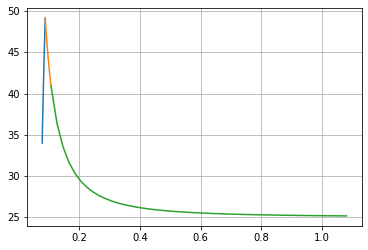

In [ ]:
#radial stress
plt.plot(r_1, sigma_r_depl1)
plt.plot(r_2, sigma_r_depl2)
plt.plot(r_3, sigma_r_depl3)
plt.grid()


In [ ]:
df = pd.DataFrame(r_1, sigma_r_depl1)
dk = pd.DataFrame(r_2, sigma_r_depl2)
di = pd.DataFrame(r_3, sigma_r_depl3)

df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")


print(df)
print(dk)
print(di)

In [ ]:
# Hoop stress change after depletion

def sigma_h_depl(G_depl, A_depl, K, delta_infinity, G, B_depl, r ):
    return G_depl * (3 * A_depl * K - delta_infinity) + 2 * G * B_depl / r**2

In [ ]:

for i in range(20, 21):
  # steel
  sigma_h_depl1 =  sigma_h_depl(G_depl_1, A_depl_1, K_1, delta_infinity_1, G_1, B_depl_1, r_1)
  # cement
  sigma_h_depl2 =  sigma_h_depl(G_depl_2, A_depl_2, K_2, delta_infinity_2, G_2, B_depl_2, r_2)
  # formation
  sigma_h_depl3 =  sigma_h_depl(G_depl_3, A_depl_3, K_10, delta_infinity_3, G_10, B_depl_3, r_3)

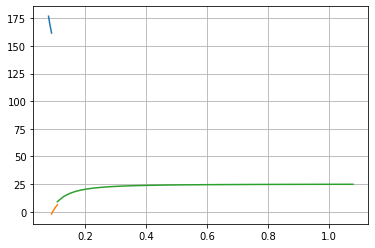

In [ ]:
#hoop stress
plt.plot(r_1, sigma_h_depl1)
plt.plot(r_2, sigma_h_depl2)
plt.plot(r_3, sigma_h_depl3)
plt.grid()

In [ ]:
df = pd.DataFrame(r_1, sigma_h_depl1)
dk = pd.DataFrame(r_2, sigma_h_depl2)
di = pd.DataFrame(r_3, sigma_h_depl3)

df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")


print(df)
print(dk)
print(di)

In [ ]:
#vertical stress change is zero

In [ ]:
#the end of depletion stage

In [ ]:
####################################

#Injection

####################################

In [ ]:
delta_T = -110
#dPf_inj is the defference between reservoir pressure at the end of injection and at the end of production.
#dPw_inj - difference between reservoir pressure at the end of production and injection pressure
# injection pressure after one month is 9.8 MPa, pore pressure at the end of production is 2 MPa
dPf_inj = 35.5
dPw_inj = 35.5


In [ ]:
# injection 1 month
delta_T_1 = -106.7
delta_T_2 = -106.7
delta_T_3 = -106.7
delta_T_4 = 0






In [ ]:
delta_inj_1 = 3 * K_1 * alpha_1 * delta_T_1
delta_inj_2 = 3 * K_2 * alpha_2  * delta_T_2 + biot_2 * dPf_inj
delta_inj_3 = 3 * K_3 * alpha_3  * delta_T_3 + biot_3 * dPf_inj
delta_inj_4 = 0

In [ ]:
print(delta_inj_1)
print(delta_inj_2)
print(delta_inj_3)
print(delta_inj_4)

-685.798245
9.194000000000003
9.194000000000003
0


In [ ]:
#for i in range(20, 21):
k5 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0],
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0],
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0],
               [0, 0, 0, 0, 2 * ( K_3 + G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, 2 * G_10],
               [0, 0, 0, 0, 1, (R_3 / R_4)**2, -1]])   

print(k5)                                                                          


[[ 3.98076923e+05 -1.59230769e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.98076923e+05 -1.25458810e+05 -1.66666667e+04  1.00000000e+04
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  7.87905567e-01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.66666667e+04 -6.79098080e+03
  -1.66666667e+04  1.00000000e+04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  6.79098080e-01
  -1.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.66666667e+04 -1.16640000e+02  8.87096774e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  1.16640000e-02 -1.00000000e+00]]


In [ ]:
# Calculation the inverse matrix
for i in range(20, 21):
  kk5 =np.linalg.inv(k5)

print(kk5)

[[-6.47213817e-06  8.76425610e-06  8.75607452e-02  8.76570590e-06
   8.75365818e-02  9.14852474e-06  8.11562679e-02]
 [-2.24605387e-05  2.19106403e-05  2.18901863e-01  2.19142648e-05
   2.18841455e-01  2.28713118e-05  2.02890670e-01]
 [-8.46078993e-09  9.11151564e-09 -2.59038889e-04  3.75153164e-05
   3.74637547e-01  3.91536978e-05  3.47331190e-01]
 [-2.41604608e-05  2.60186600e-05 -7.39706219e-01 -1.14832392e-05
  -1.14674565e-01 -1.19847391e-05 -1.06316234e-01]
 [-8.46078993e-09  9.11151564e-09 -2.59038889e-04  1.53163505e-08
  -3.62452804e-04  3.91536978e-05  3.47331190e-01]
 [-1.64073226e-05  1.76692221e-05 -5.02333073e-01  2.97017543e-05
  -7.02875277e-01 -8.13881331e-06 -7.21991503e-02]
 [-1.99835800e-07  2.15205322e-07 -6.11825185e-03  3.61757613e-07
  -8.56079003e-03  3.90587667e-05 -6.53510941e-01]]


In [ ]:
for i in range(20, 21):
  g5 = np.array([[delta_inj_1 - dPw_inj],
                [delta_inj_1 - delta_inj_2],
                [0],
                [delta_inj_2 - delta_inj_3],
                [0],
                [delta_inj_3],
                [0]])   
  
  print(g5)

[[-721.298245]
 [-694.992245]
 [   0.      ]
 [   0.      ]
 [   0.      ]
 [   9.194   ]
 [   0.      ]]


In [ ]:
#Multiplication of the inverse matrix by vector

for i in range(20, 21):
  ff = kk5.dot(g5)

print(ff)

[[-0.00133864]
 [ 0.0011833 ]
 [ 0.00035975]
 [-0.00076606]
 [ 0.00035975]
 [-0.00052023]
 [ 0.00035368]]


In [ ]:
for i in range(20, 21):
  A_1_inj = ff[0]
  B_1_inj = ff[1] * R_1**2
  A_2_inj = ff[2]
  B_2_inj = ff[3] * R_2**2 
  A_3_inj = ff[4]
  B_3_inj = ff[5] * R_3**2
  A_4_inj = 0
  B_4_inj = ff[6] * R_4**2

  
  sheet_obj.cell(row=i, column=12).value = A_1_inj[0]
  sheet_obj.cell(row=i, column=13).value = B_1_inj[0]
  sheet_obj.cell(row=i, column=23).value = A_2_inj[0]
  sheet_obj.cell(row=i, column=24).value = B_2_inj[0]
  sheet_obj.cell(row=i, column=33).value = A_3_inj[0]
  sheet_obj.cell(row=i, column=34).value = B_3_inj[0]

  A_inj_1 = A_1_inj[0]
  B_inj_1 = B_1_inj[0]
  A_inj_2 = A_2_inj[0]
  B_inj_2 = B_2_inj[0]
  A_inj_3 = A_3_inj[0]
  B_inj_3 = B_3_inj[0]
  A_inj_4 = A_4_inj
  B_inj_4 = B_4_inj[0]




A_inj_1, B_1_inj, A_2_inj, B_2_inj, A_3_inj,  B_3_inj

(-0.0013386365862817866,
 array([7.38498088e-06]),
 array([0.00035975]),
 array([-6.06793466e-06]),
 array([0.00035975]),
 array([-6.06793466e-06]))

In [ ]:
#displacement

def e_inj(r, A_inj, B_inj):
    return A_inj * r + B_inj / r


In [ ]:
# displacement

for i in range(20, 21):
  # cement
  e_inj_2 = e_inj(r_2, A_inj_2, B_inj_2)
  # steel
  e_inj_1 = e_inj(r_1, A_inj_1, B_inj_1)
  # far_cement
  e_inj_3 = e_inj(r_3, A_inj_3, B_inj_3)
  # formation
  e_inj_4 = e_inj(r_4, A_inj_4, B_inj_4)




  #sheet_obj.cell(row=i, column=8).value = u1
  #sheet_obj.cell(row=i, column=19).value = u2
  #sheet_obj.cell(row=i, column=29).value = u3

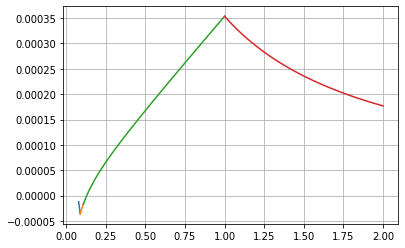

In [ ]:
plt.plot(r_1, e_inj_1)
plt.plot(r_2, e_inj_2)
plt.plot(r_3, e_inj_3)
plt.plot(r_4, e_inj_4)
plt.grid()

In [ ]:
df = pd.DataFrame(r_1, e_inj_1)
dk = pd.DataFrame(r_2, e_inj_2)
di = pd.DataFrame(r_3, e_inj_3)
dm = pd.DataFrame(r_4, e_inj_4)


print(df)
print(dk)
print(di)
print(dm)

                  0
-0.000012  0.079000
-0.000013  0.079204
-0.000013  0.079408
-0.000014  0.079612
-0.000014  0.079816
-0.000015  0.080020
-0.000015  0.080224
-0.000016  0.080429
-0.000016  0.080633
-0.000017  0.080837
-0.000017  0.081041
-0.000018  0.081245
-0.000018  0.081449
-0.000019  0.081653
-0.000019  0.081857
-0.000020  0.082061
-0.000020  0.082265
-0.000021  0.082469
-0.000021  0.082673
-0.000022  0.082878
-0.000022  0.083082
-0.000023  0.083286
-0.000023  0.083490
-0.000024  0.083694
-0.000024  0.083898
-0.000025  0.084102
-0.000025  0.084306
-0.000026  0.084510
-0.000026  0.084714
-0.000027  0.084918
-0.000027  0.085122
-0.000028  0.085327
-0.000028  0.085531
-0.000029  0.085735
-0.000029  0.085939
-0.000030  0.086143
-0.000030  0.086347
-0.000031  0.086551
-0.000031  0.086755
-0.000031  0.086959
-0.000032  0.087163
-0.000032  0.087367
-0.000033  0.087571
-0.000033  0.087776
-0.000034  0.087980
-0.000034  0.088184
-0.000035  0.088388
-0.000035  0.088592
-0.000036  0.088796


In [ ]:
def sigma_r_inj(K, A_inj, G, B_inj, r, delta_inj):
    return 2 * K * A_inj + 2 * G / 3 * (A_inj - 3 * B_inj / r**2) - delta_inj

def sigma_h_inj(K, A_inj, G, B_inj, r, delta_inj):
    return 2 * K * A_inj + 2 * G / 3 * (A_inj + 3 * B_inj / r**2) - delta_inj

In [ ]:
sigma_v_inj_4 = - delta_inj_4

sigma_v_inj_1 = (K_1 - 2 * G_1 / 3) * 2 * A_inj_1 - delta_inj_1

sigma_v_inj_2 = (K_2 - 2 * G_2 / 3) * 2 * A_inj_2 - delta_inj_2

sigma_v_inj_3 = (K_10 - 2 * G_10 / 3) * 2 * A_inj_3 - delta_inj_3

print(sigma_v_inj_1)
print(sigma_v_inj_2)
print(sigma_v_inj_3)
print(sigma_v_inj_4)

366.07004496885014
-6.795670549161846
-6.248161096365047
0


In [ ]:
#radial stress

for i in range(20, 21):
  # steel
  sigma_r_inj1 =  sigma_r_inj(K_1, A_inj_1, G_1, B_inj_1, r_1, delta_inj_1)
  # cement
  sigma_r_inj2 =  sigma_r_inj(K_2, A_inj_2, G_2, B_inj_2, r_2, delta_inj_2)
  # far cement
  sigma_r_inj3 =  sigma_r_inj(K_3, A_inj_3, G_3, B_inj_3, r_3, delta_inj_3)
  # formation
  sigma_r_inj4 =  sigma_r_inj(K_10, A_inj_4, G_10, B_inj_4, r_4, delta_inj_4)



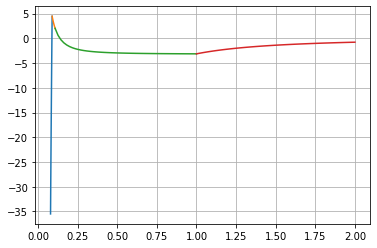

In [ ]:
#radial stress
plt.plot(r_1, sigma_r_inj1)
plt.plot(r_2, sigma_r_inj2)
plt.plot(r_3, sigma_r_inj3)
plt.plot(r_4, sigma_r_inj4)
plt.grid()


In [ ]:
df = pd.DataFrame(r_1, sigma_r_inj1)
dk = pd.DataFrame(r_2, sigma_r_inj2)
di = pd.DataFrame(r_3, sigma_r_inj3)
dm = pd.DataFrame(r_4, sigma_r_inj4)

df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")
dm.to_csv("out4.csv")


print(df)
print(dk)
print(di)
print(dm)

In [ ]:
# hoop stress

for i in range(20, 21):
  # steel
  sigma_h_inj1 =  sigma_h_inj(K_1, A_inj_1, G_1, B_inj_1, r_1, delta_inj_1)
  # cement
  sigma_h_inj2 =  sigma_h_inj(K_2, A_inj_2, G_2, B_inj_2, r_2, delta_inj_2)
  # formation
  sigma_h_inj3 =  sigma_h_inj(K_10, A_inj_3, G_10, B_inj_3, r_3, delta_inj_3)
  sigma_h_inj4 =  sigma_h_inj(K_10, A_inj_4, G_10, B_inj_4, r_4, delta_inj_4)

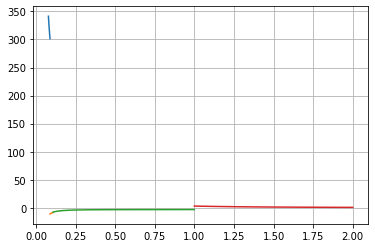

In [ ]:
#hoop stress
plt.plot(r_1, sigma_h_inj1)
plt.plot(r_2, sigma_h_inj2)
plt.plot(r_3, sigma_h_inj3)
plt.plot(r_4, sigma_h_inj4)
plt.grid()


In [ ]:
df = pd.DataFrame(r_1, sigma_h_inj1)
dk = pd.DataFrame(r_2, sigma_h_inj2)
di = pd.DataFrame(r_3, sigma_h_inj3)
dm = pd.DataFrame(r_4, sigma_h_inj4)

df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")
dm.to_csv("out4.csv")


print(df)
print(dk)
print(di)
print(dm)

                   0
341.335823  0.079000
340.366098  0.079204
339.403840  0.079408
338.448972  0.079612
337.501420  0.079816
336.561108  0.080020
335.627963  0.080224
334.701913  0.080429
333.782885  0.080633
332.870809  0.080837
331.965615  0.081041
331.067233  0.081245
330.175597  0.081449
329.290637  0.081653
328.412288  0.081857
327.540484  0.082061
326.675161  0.082265
325.816253  0.082469
324.963699  0.082673
324.117434  0.082878
323.277399  0.083082
322.443531  0.083286
321.615770  0.083490
320.794057  0.083694
319.978334  0.083898
319.168542  0.084102
318.364623  0.084306
317.566521  0.084510
316.774181  0.084714
315.987546  0.084918
315.206562  0.085122
314.431175  0.085327
313.661333  0.085531
312.896981  0.085735
312.138068  0.085939
311.384542  0.086143
310.636353  0.086347
309.893451  0.086551
309.155785  0.086755
308.423306  0.086959
307.695967  0.087163
306.973718  0.087367
306.256514  0.087571
305.544306  0.087776
304.837048  0.087980
304.134695  0.088184
303.437202  0

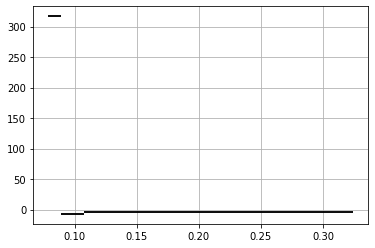

In [ ]:
#vertical stress

plt.hlines((sigma_v_inj_1, sigma_v_inj_1), R_1, R_2)
plt.hlines((sigma_v_inj_2, sigma_v_inj_2), R_2, R_3)
plt.hlines((sigma_v_inj_3, sigma_v_inj_3), R_3, 3 * R_3)
plt.grid()

In [ ]:
# Case 2.3

In [ ]:
phi1 = (R_1 / R_2)**2
phi2 = (R_2 / R_3)**2
phi3 = (R_3 / R_4)**2
phi4 = (R_4 / R_5)**2
phi5 = (R_5 / R_6)**2
phi6 = (R_6 / R_7)**2
phi7 = (R_7 / R_8)**2
phi8 = (R_8 / R_9)**2
phi9 = (R_9 / R_10)**2
D1 = G_1 * G_2 + (K_1 + G_1 / 3)  * (G_2 * phi1 + G_1 * (1 - phi1))
D2 = G_2 * G_3 + (K_2 + G_2 / 3)  * (G_3 * phi2 + G_2 * (1 - phi2))
D3 = G_3 * G_4 + (K_3 + G_3 / 3)  * (G_4 * phi3 + G_3 * (1 - phi3))
D4 = G_4 * G_5 + (K_4 + G_4 / 3)  * (G_5 * phi4 + G_4 * (1 - phi4))
D5 = G_5 * G_6 + (K_5 + G_5 / 3)  * (G_6 * phi5 + G_5 * (1 - phi5))
D6 = G_6 * G_7 + (K_6 + G_6 / 3)  * (G_7 * phi6 + G_6 * (1 - phi6))
D7 = G_7 * G_8 + (K_7 + G_7 / 3)  * (G_8 * phi7 + G_7 * (1 - phi7))
D8 = G_8 * G_9 + (K_8 + G_8 / 3)  * (G_9 * phi8 + G_8 * (1 - phi8))
D9 = G_9 * G_10 + (K_9 + G_9 / 3)  * (G_10 * phi9 + G_9 * (1 - phi9))
m1 = np.array([[G_1, G_2 * phi1 + G_1*(1 - phi1)], [K_1 + G_1 / 3, -G_2]])
v1 = np.array([[-K_2 * alpha_2], [K_1 * alpha_1]])
m1, v1

(array([[ 79615.38461538,  37395.36885073],
        [199038.46153846,  -5116.66666667]]), array([[-0.0614],
        [ 2.139 ]]))

In [ ]:
res = 1/D1 * m1 * 3 * dT / 2 @ v1
res[1,0]

4.426259050186326e-06

In [ ]:
A_1 =  G_1 * (-K_2 * alpha_2) +  (G_2 * phi1 + G_1*(1 - phi1)) *  (K_1 * alpha_1)    #res[0,0]
A_1 = A_1 * 1.5 * dT / D1
A_1



-1.4349496379925467e-05

In [ ]:
B_1 = (K_1 + G_1 / 3) *  (-K_2 * alpha_2) + (-G_2) * (K_1 * alpha_1)                # * R_i**2
B_1 = B_1 * 1.5 * dT / D1 * R_1**2
B_1


1.9869476876286425e-08

In [ ]:
B_2 = B_1 + A_1 * R_2**2
B_2

-9.37928839491032e-08

In [ ]:
A_2 = 0
A_2

0

In [ ]:
# cement
u2 = u(r_2, A_2, B_2)
# steel
u1 = u(r_1, A_1, B_1)


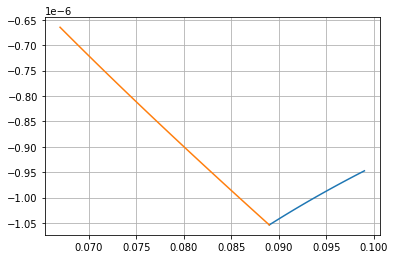

In [ ]:
plt.plot(r_2, u2)
plt.plot(r_1, u1)
plt.grid()

In [ ]:
# Stress plot
sigma_2r = sigma_r(K_2, G_2, alpha_2, dT, A_2, B_2, r_2)
sigma_1r = sigma_r(K_1, G_1, alpha_1, dT, A_1, B_1, r_1)
sigma_2phi = sigma_phi(K_2, G_2, alpha_2, dT, A_2, B_2, r_2)
sigma_1phi = sigma_phi(K_1, G_1, alpha_1, dT, A_1, B_1, r_1)


Text(0, 0.5, '$\\sigma$')

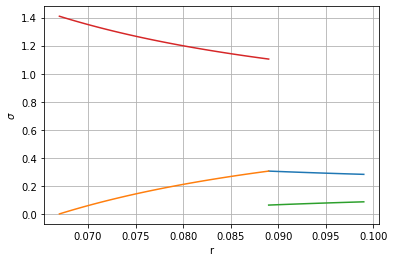

In [ ]:
plt.plot(r_2, sigma_2r)
plt.plot(r_1, sigma_1r)
plt.plot(r_2, sigma_2phi)
plt.plot(r_1, sigma_1phi)
plt.grid(True)
plt.xlabel("r")
plt.ylabel("$\\sigma$")

In [ ]:
# multi-layered well structure

In [ ]:
#all_cases

n0 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 * G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 * G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 * G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 * G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, -2 * (K_7 + G_7 / 3), 2 * G_7, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1, -1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_7 * G_7 / 3), -2 * G_7 * (R_7 / R_8)**2, -2 * (K_8 + G_8 / 3), 2 * G_8, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_7**2 / R_8**2, -1, -1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_8 * G_8 / 3), -2 * G_8 * (R_8 / R_9)**2, -2 * (K_9 + G_9 / 3), 2 * G_9, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_8**2 / R_9**2, -1, -1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_9 * G_9 / 3), -2 * G_9 * (R_9 / R_10)**2, -2 * (K_10 + G_10 / 3), 2 * G_10, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_9**2 / R_10**2, -1, -1]], dtype=object)



l0 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_7 * alpha_7 * dT],
               [0],
               [3 * K_7 * alpha_7 * dT - 3 * K_8 * alpha_8 * dT],
               [0],
               [3 * K_8 * alpha_8 * dT - 3 * K_9 * alpha_9 * dT],
               [0],
               [3 * K_9 * alpha_8 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])
n0, l0

(array([list([398076.92307692306, -159230.76923076922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([398076.92307692306, -90239.48025210493, -17055.555555555555, 10233.333333333334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([1, 0.5667213735639441, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 17055.555555555555, -8270.40438050539, -398076.92307692306, 159230.76923076922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 1, 0.8081828384858687, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 9155769230.76923, -104852.24195315568, -14300.847457627118, 9152.542372881357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 1, 0.6584923407686106, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 0, 0, 17161016.949152544, -5526.6518186525245, -398076.92307692306, 159230.76923076922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 0, 0, 0, 

In [ ]:
#3555-3888 m

n5 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2,  2 * G_10],                      
               [0, 0, 1, R_2**2 / R_3**2, -1]])                                                                                                                                     
             



l5 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_10 * alpha_2 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])
n5, l5

(array([[ 3.98076923e+05, -1.59230769e+05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 3.98076923e+05, -9.02394803e+04, -1.70555556e+04,
          1.02333333e+04,  0.00000000e+00],
        [ 1.00000000e+00,  5.66721374e-01, -1.00000000e+00,
         -1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.70555556e+04,
         -8.27040438e+03,  6.66666667e+03],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          8.08182838e-01, -1.00000000e+00]]), array([[-6.417     ],
        [-6.2328    ],
        [ 0.        ],
        [ 0.01333333],
        [ 0.        ]]))

In [ ]:
print ("First row of the matrix d:\n", n5[0])

First row of the matrix d:
 [ 398076.92307692 -159230.76923077       0.               0.
       0.        ]


In [ ]:
A5_1 = np.dot(n5[0], l5) 
B5_1 = np.dot(n5[1], l5) * R_1**2
A5_2 = np.dot(n5[2], l5) 
B5_2 = np.dot(n5[3], l5) * R_2**2
A5_3 = 0
B5_3 = np.dot(n5[4], l5) * R_3**2

A5_1, B5_1, A5_2, B5_2, A5_3,  B5_3

(array([-1562006.07692308]),
 array([-8941.54275899]),
 array([-9.96259431]),
 array([-0.87346497]),
 0,
 array([0.00010561]))

In [ ]:
# cement
u5_2 = u(R_2, A_2, B_2)
# steel
u1 = u(r_1, A_1, B_1)
#formation


In [ ]:
#2329-3555 m

n4 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 * G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, 2 * G_10],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1]])

l4 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])
n4, l4


(array([[ 3.98076923e+05, -1.59230769e+05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 3.98076923e+05, -9.02394803e+04, -1.70555556e+04,
          1.02333333e+04,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 1.00000000e+00,  5.66721374e-01, -1.00000000e+00,
         -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.70555556e+04,
         -8.27040438e+03, -3.98076923e+05,  1.59230769e+05,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          8.08182838e-01, -1.00000000e+00, -1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  9.15576923e+09, -1.04852242e+05,
          6.66666667e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  6.58492341e-01

In [ ]:
A4_1 = np.dot(n4[0], l4) 
B4_1 = np.dot(n4[1], l4) * R_1**2
A4_2 = np.dot(n4[2], l4)
B4_2 = np.dot(n4[3], l4) * R_2**2
A4_3 = np.dot(n4[4], l4) 
B4_3 = np.dot(n4[5], l4) * R_3**2
A4_4 = 0
B4_4 = np.dot(n4[6], l4) * R_3**2


A4_1, B4_1, A4_2, B5_2, A4_3, B4_3, A4_4, B4_4

(array([-1562006.07692308]),
 array([-8655.83642362]),
 array([-16.18206098]),
 array([-0.87346497]),
 array([11.32090866]),
 array([6457.45292586]),
 0,
 array([-0.04055405]))

In [ ]:
# 506-2329

n3 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 * G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 * G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 * G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 * G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, 2 * G_10],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1]])

l3 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])

n3, l3


(array([[ 3.98076923e+05, -1.59230769e+05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 3.98076923e+05, -9.02394803e+04, -1.70555556e+04,
          1.02333333e+04,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 1.00000000e+00,  5.66721374e-01, -1.00000000e+00,
         -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.70555556e+04,
         -8.27040438e+03, -3.98076923e+05,  1.59230769e+05,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.0000000

In [ ]:
A3_1 = np.dot(n3[0], l3) 
B3_1 = np.dot(n3[1], l3) * R_1**2
A3_2 = np.dot(n3[2], l3)
B3_2 = np.dot(n3[3], l3) * R_2**2
A3_3 = np.dot(n3[4], l3) 
B3_3 = np.dot(n3[5], l3) * R_3**2
A3_4 = np.dot(n3[6], l3) 
B3_4 = np.dot(n3[7], l3) * R_4**2
A3_5 = np.dot(n3[8], l3)
B3_5 = np.dot(n3[9], l3) * R_5**2
A3_6 = np.dot(n3[10], l3)
B3_6 = np.dot(n3[11], l3) * R_6**2
A3_7 = 0
B3_7 = np.dot(n3[12], l3) * R_7**2




A3_1, B3_1, A3_2, B3_2, A3_3, B3_3, A3_4, B3_4, A3_5, B3_5, A3_6, B3_6, B3_7, A3_7

(array([-1562006.07692308]),
 array([-8655.83642362]),
 array([-16.18206098]),
 array([-8310.30486849]),
 array([11.302367]),
 array([7000.40565335]),
 array([-10.39066183]),
 array([-15363.64936613]),
 array([10.04824482]),
 array([20968.66937772]),
 array([-5.32502464]),
 array([2.79976234]),
 array([-0.00053585]),
 0)

In [ ]:
#102-512 m

n2 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 * G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 * G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 * G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 * G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, -2 * (K_7 + G_7 / 3), 2 * G_7, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1, -1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_7 * G_7 / 3), -2 * G_7 * (R_7 / R_8)**2, -2 * (K_8 + G_8 / 3), 2 * G_8, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_7**2 / R_8**2, -1, -1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_8 * G_8 / 3), -2 * G_8 * (R_8 / R_9)**2, 2 * G_10],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_8**2 / R_9**2, -1]])



l2 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_7 * alpha_7 * dT],
               [0],
               [3 * K_7 * alpha_7 * dT - 3 * K_8 * alpha_8 * dT],
               [0],
               [3 * K_8 * alpha_8 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])

n2, l2

(array([[ 3.98076923e+05, -1.59230769e+05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 3.98076923e+05, -9.02394803e+04, -1.70555556e+04,
          1.02333333e+04,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  5.66721374e-01, -1.00000000e+00,
         -1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.

In [ ]:
A2_1 = np.dot(n2[0], l2) 
B2_1 = np.dot(n2[1], l2) * R_1**2
A2_2 = np.dot(n2[2], l2)
B2_2 = np.dot(n2[3], l2) * R_2**2
A2_3 = np.dot(n2[4], l2) 
B2_3 = np.dot(n2[5], l2) * R_3**2
A2_4 = np.dot(n2[6], l2) 
B2_4 = np.dot(n2[7], l2) * R_4**2
A2_5 = np.dot(n2[8], l2)
B2_5 = np.dot(n2[9], l2) * R_5**2
A2_6 = np.dot(n2[10], l2)
B2_6 = np.dot(n2[11], l2) * R_6**2
A2_7 = np.dot(n2[12], l2)
B2_7 = np.dot(n2[13], l2) * R_7**2
A2_8 = np.dot(n2[14], l2)
B2_8 = np.dot(n2[15], l2) * R_8**2
A2_9 = 0
B2_9 = np.dot(n2[16], l2) * R_9**2




A2_1, B2_1, A2_2, B2_2, A2_3, B2_3, A2_4, B2_4, A2_5, B2_5, A2_6, B2_6, B2_7, B2_7, A2_8, B2_8, B2_9, A2_9

(array([-1562006.07692308]),
 array([-8655.83642362]),
 array([-16.18206098]),
 array([-8310.30486849]),
 array([11.302367]),
 array([7000.40565335]),
 array([-10.39066183]),
 array([-15363.64936613]),
 array([10.04824482]),
 array([22386.27096789]),
 array([-11.6086913]),
 array([-29776.68341599]),
 array([39620.97991913]),
 array([39620.97991913]),
 array([-4.89763344]),
 array([5.79928604]),
 array([-0.00119623]),
 0)

In [ ]:
#0-102 m

n1 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 * G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 * G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 * G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 * G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, -2 * (K_7 + G_7 / 3), 2 * G_7, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1, -1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_7 * G_7 / 3), -2 * G_7 * (R_7 / R_8)**2, -2 * (K_8 + G_8 / 3), 2 * G_8, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_7**2 / R_8**2, -1, -1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_8 * G_8 / 3), -2 * G_8 * (R_8 / R_9)**2, -2 * (K_9 + G_9 / 3), 2 * G_9, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_8**2 / R_9**2, -1, -1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_9 * G_9 / 3), -2 * G_9 * (R_9 / R_10)**2, -2 * (K_10 + G_10 / 3)],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_9**2 / R_10**2, -1]], dtype=object)



l1 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_7 * alpha_7 * dT],
               [0],
               [3 * K_7 * alpha_7 * dT - 3 * K_8 * alpha_8 * dT],
               [0],
               [3 * K_8 * alpha_8 * dT - 3 * K_9 * alpha_9 * dT],
               [0],
               [3 * K_9 * alpha_9 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])
n1, l1

(array([[398076.92307692306, -159230.76923076922, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0],
        [398076.92307692306, -90239.48025210493, -17055.555555555555,
         10233.333333333334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0.5667213735639441, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 17055.555555555555, -8270.40438050539, -398076.92307692306,
         159230.76923076922, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0.8081828384858687, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 9155769230.76923, -104852.24195315568,
         -14300.847457627118, 9152.542372881357, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 1, 0.6584923407686106, -1, -1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 17161016.949152544, -5526.6518186525245,
         -398076.92307692306, 159230.76923076922, 0, 0, 0, 0, 0, 0, 0, 0,
         0],
        

In [ ]:
print ("18TH row of the matrix d:\n", n1[17])

18TH row of the matrix d:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9155769230.76923 -133606.59490549748
 -11111.111111111111]


In [ ]:
A1_1 = np.dot(n1[0], l1) 
B1_1 = np.dot(n1[1], l1) * R_1**2
A1_2 = np.dot(n1[2], l1)
B1_2 = np.dot(n1[3], l1) * R_2**2
A1_3 = np.dot(n1[4], l1) 
B1_3 = np.dot(n1[5], l1) * R_3**2
A1_4 = np.dot(n1[6], l1) 
B1_4 = np.dot(n1[7], l1) * R_4**2
A1_5 = np.dot(n1[8], l1)
B1_5 = np.dot(n1[9], l1) * R_5**2
A1_6 = np.dot(n1[10], l1)
B1_6 = np.dot(n1[11], l1) * R_6**2
A1_7 = np.dot(n1[12], l1)
B1_7 = np.dot(n1[13], l1) * R_7**2
A1_8 = np.dot(n1[14], l1)
B1_8 = np.dot(n1[15], l1) * R_8**2
A1_9 = np.dot(n1[16], l1)
B1_9 = np.dot(n1[17], l1) * R_9**2
A1_10 = 0
B1_10 = np.dot(n1[18], l1) * R_10**2




A1_1, B1_1, A1_2, B1_2, A1_3, B1_3, A1_4, B1_4, A1_5, B1_5, A1_6, B1_6, B1_7, B1_7, A1_8, B1_8, A1_9, B1_9, B1_10, A1_10

(array([-1562006.0769230765], dtype=object),
 array([-8655.836423620269], dtype=object),
 array([-16.18206097714935], dtype=object),
 array([-8310.304868487414], dtype=object),
 array([11.30236699571472], dtype=object),
 array([7000.405653350896], dtype=object),
 array([-10.39066182645794], dtype=object),
 array([-15363.649366127813], dtype=object),
 array([10.048244822305163], dtype=object),
 array([22386.270967891433], dtype=object),
 array([-11.60869130190311], dtype=object),
 array([-29776.683415990872], dtype=object),
 array([42532.50089370771], dtype=object),
 array([42532.50089370771], dtype=object),
 array([-11.18130010578771], dtype=object),
 array([-66511.22848294112], dtype=object),
 array([9.602201034200595], dtype=object),
 array([102256.72711418627], dtype=object),
 array([-0.7653568836666664], dtype=object),
 0)